In [2]:
"""
author: William Darko (repurposed from original author Francois Chollet)
date: June, 2021
description: Multi-label multi-class classification problem using keras provided reuters database. Taken, and repurposed from 'Deep Learning with Python' (Manning publisher), by Francois Chollet.
"""

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.datasets import reuters
from keras.utils.np_utils import to_categorical

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

/Users/williammatrix/opt/anaconda3/envs/ai/lib/python3.9/site-packages/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/Users/williammatrix/opt/anaconda3/envs/ai/lib/python3.9/site-packages/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [8]:
def encode_sequences(sequences, dimesion=10000):
    results =  np.zeros((len(sequences),dimesion))
    for i, review in enumerate(sequences):
        results[i, review] = 1 # equivalent of iterating a through review with a second counter j, and doing results[i][j] = 1
    return results

xaxis_train = encode_sequences(train_data)
xaxis_test = encode_sequences(test_data)

print(xaxis_train[:10], xaxis_train.shape)

# one-hot encode the labels. each label is represented as a vector of all zeros except for the index 0-46 corresponding to the topic label index

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

sparse_encoded_train_labels = np.array(train_labels)

print(one_hot_train_labels[:10], one_hot_train_labels.shape)

print(sparse_encoded_train_labels[:10], sparse_encoded_train_labels.shape)
print("testing labels: {}, shape: {}".format(one_hot_test_labels[:10], one_hot_test_labels.shape))

[[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]] (8982, 10000)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [10]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
xaxis_validation_set = xaxis_train[:1000]
partial_xaxis_train = xaxis_train[1000:]

yaxis_validation_set = one_hot_train_labels[:1000]
partial_yaxis_train = one_hot_train_labels[1000:]

history = model.fit(partial_xaxis_train, partial_yaxis_train, epochs=9, batch_size=512, validation_data=(xaxis_validation_set, yaxis_validation_set))

Epoch 1/9
16/16 [==============================] - 14s 47ms/step - loss: 3.0357 - accuracy: 0.4256 - val_loss: 1.6561 - val_accuracy: 0.6540
Epoch 2/9
16/16 [==============================] - 0s 18ms/step - loss: 1.4384 - accuracy: 0.7064 - val_loss: 1.2466 - val_accuracy: 0.7270
Epoch 3/9
16/16 [==============================] - 0s 18ms/step - loss: 1.0517 - accuracy: 0.7751 - val_loss: 1.0979 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 0s 18ms/step - loss: 0.8141 - accuracy: 0.8234 - val_loss: 1.0194 - val_accuracy: 0.7860
Epoch 5/9
16/16 [==============================] - 0s 18ms/step - loss: 0.6133 - accuracy: 0.8693 - val_loss: 0.9209 - val_accuracy: 0.8090
Epoch 6/9
16/16 [==============================] - 0s 18ms/step - loss: 0.5001 - accuracy: 0.9027 - val_loss: 0.9020 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 0s 18ms/step - loss: 0.4002 - accuracy: 0.9198 - val_loss: 0.8777 - val_accuracy: 0.8290
Epoch 8/9
16/16 [==

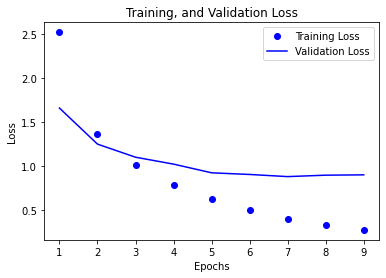

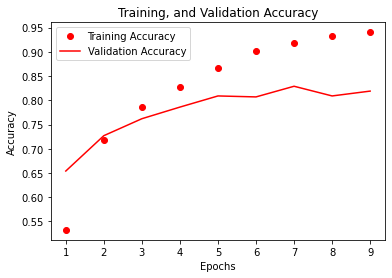

In [12]:
train_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title("Training, and Validation Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()

train_accuracy = history.history['accuracy']
validation_acc = history.history['val_accuracy']

plt.plot(epochs, train_accuracy, 'ro', label="Training Accuracy")
plt.plot(epochs, validation_acc, 'r', label="Validation Accuracy")
plt.title("Training, and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


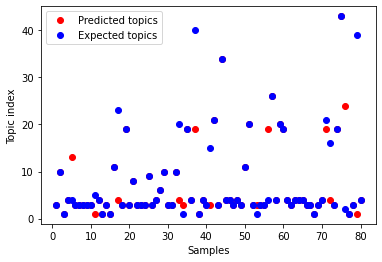

In [38]:
predictions = model.predict(xaxis_test)

pred_max = np.zeros((2246,))
test_max = np.zeros((2246,))

for i in range(predictions.shape[0]):
    pred_max[i] = np.argmax(predictions[i])
    test_max[i] = np.argmax(one_hot_test_labels[i])

# print(pred_max.shape)
# print(pred_max[:5])
# print(test_max.shape)
# print(test_max[:5])

cap = 80

plt.clf()
plt.plot(range(1,len(pred_max[:cap])+1), pred_max[:cap], 'ro', label="Predicted topics")
plt.plot(range(1,len(test_max[:cap])+1), test_max[:cap], 'bo', label="Expected topics")
plt.xlabel("Samples")
plt.ylabel("Topic index")
plt.legend()
plt.show()